In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import os

In [5]:
os.listdir(r'C:\Users\Abhiii\Downloads\Bitcoin')

['bitcoin_analysis_Shan_Singh.ipynb', 'bitcoin_price_Training - Training.csv']

In [6]:
df = pd.read_csv(r'C:\Users\Abhiii\Downloads\Bitcoin/bitcoin_price_Training - Training.csv')

In [7]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [9]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [10]:
#Now the first step is to preprocess the data by converting the datatypes, removing the duplicated etc

In [11]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [12]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [13]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [14]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [15]:
#from timestamps we can clear see that the available data is from 4 april 2013 to 31 july 2017

In [16]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
#Next problem is we have to find the chnage in price of stock overtime
#for that first convert the data from lowest date value to highest
# then draw the subplots of open, close, high and low column
#there are 2 rows and 2 columns and a index, in this only the index changes

In [19]:
 df.sort_index(ascending=False).reset_index()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [20]:
data =  df.sort_index(ascending=False).reset_index()

In [21]:
data.drop('index', axis = 1, inplace = True)

In [22]:
data.head(5)


,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [23]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

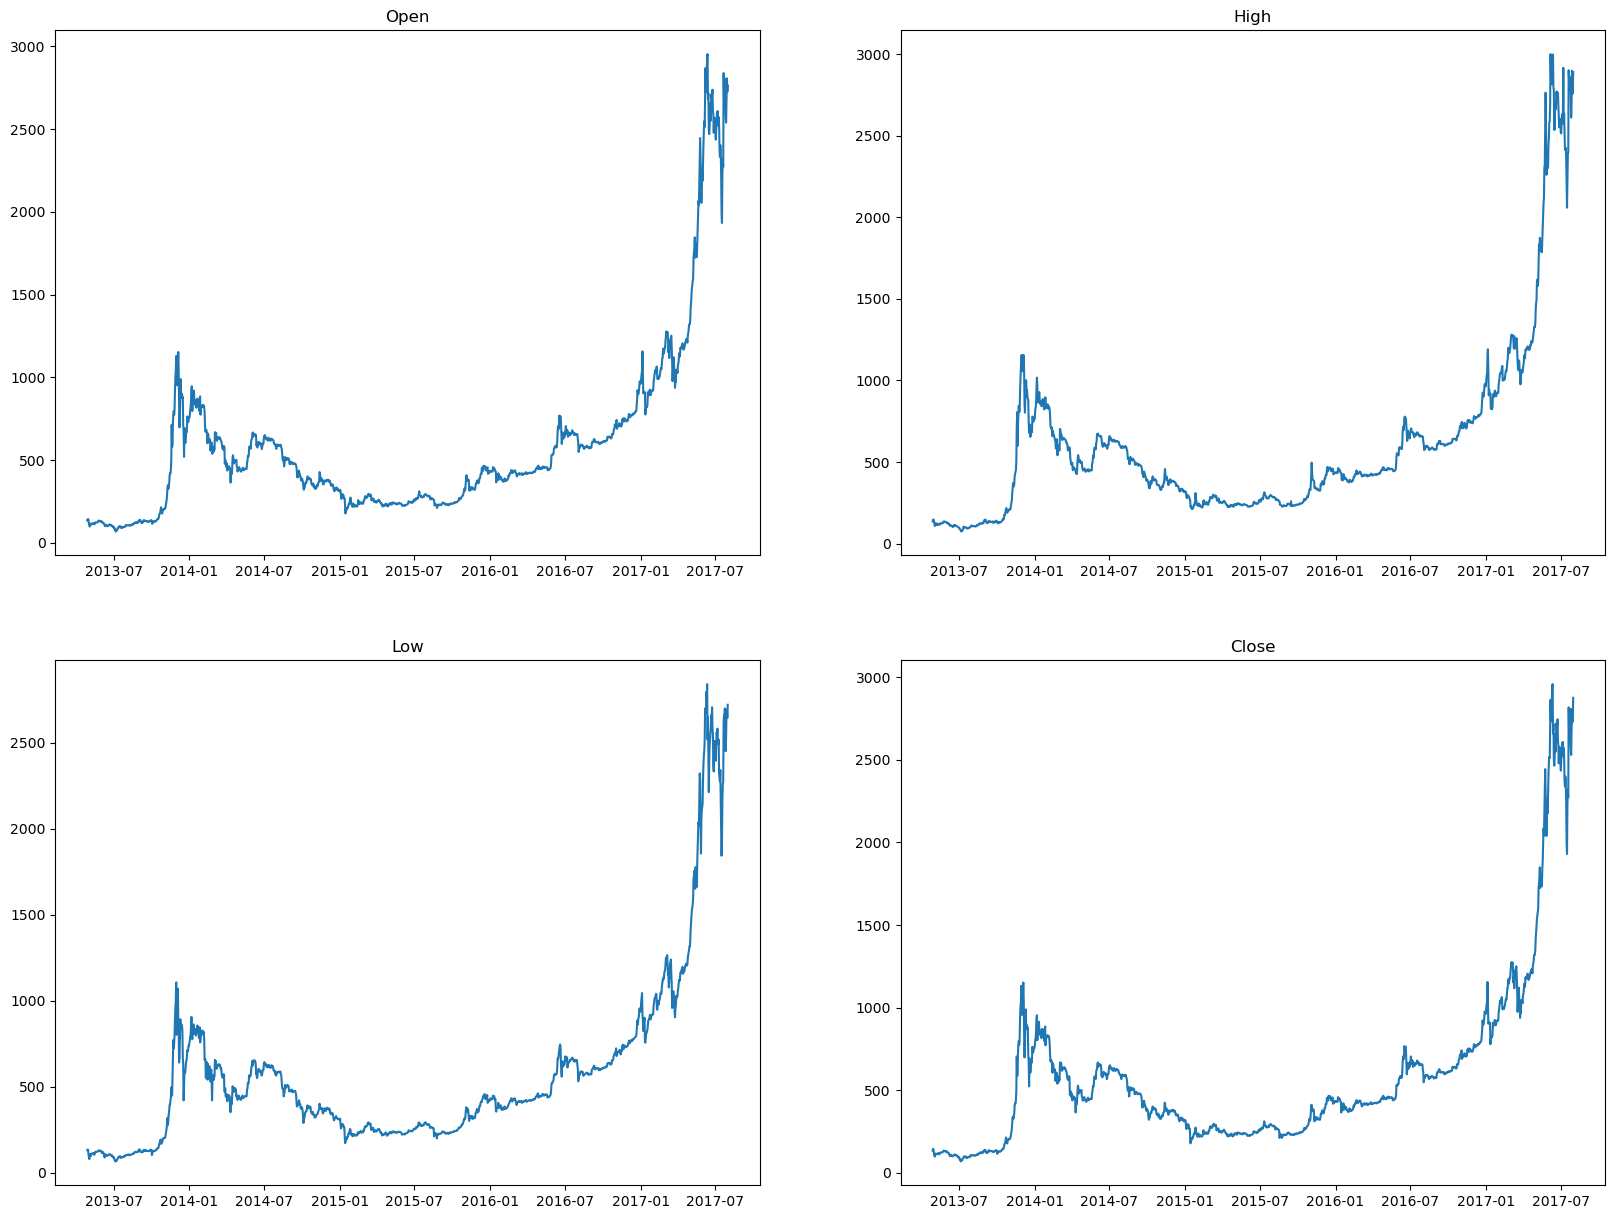

In [24]:
plt.figure(figsize= (20,15))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'],df[col])
    plt.title(col)

In [25]:
#next problem: analysing open, high, low and close value of bitcoin
# in this we using candle-stick chart

In [26]:
bitcoin_sample = data[0:50]

In [27]:
!pip install chart_studio
!pip install plotly

In [28]:
import chart_studio,plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [29]:
init_notebook_mode(connected=True)

In [30]:
trace = go.Candlestick(x= bitcoin_sample['Date'],
               high = bitcoin_sample['High'],
               open = bitcoin_sample['Open'],
               close = bitcoin_sample['Close'],
               low = bitcoin_sample['Low'])

In [31]:
candle_data = [trace]
layout = {
    'title': 'Bitcoin Historical Price' ,
    'xaxis':{'title': 'Date'}
}

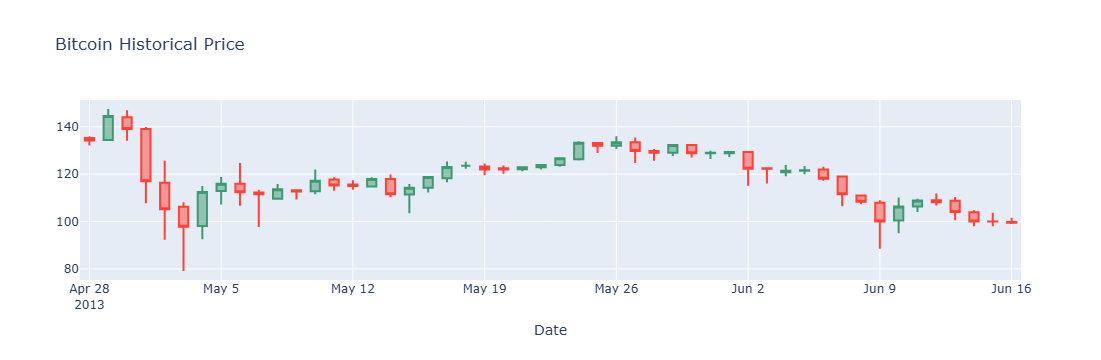

In [32]:
 fig = go.Figure(data = candle_data, layout = layout)

fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()


In [33]:
#Next problem is to analyse the close price through different plots

In [34]:
data


,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


<Axes: >

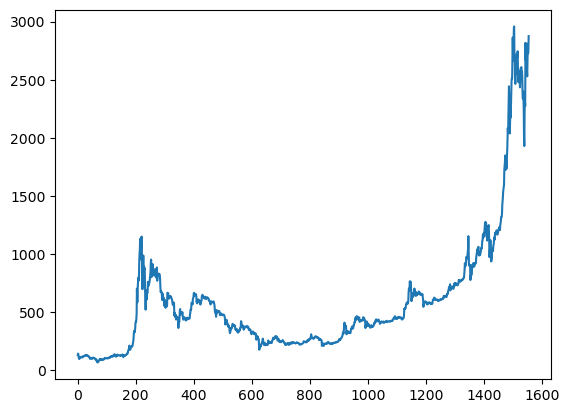

In [79]:
data['Close'].plot()

In [83]:
data.set_index('Date' , inplace = True)

<Axes: xlabel='Date'>

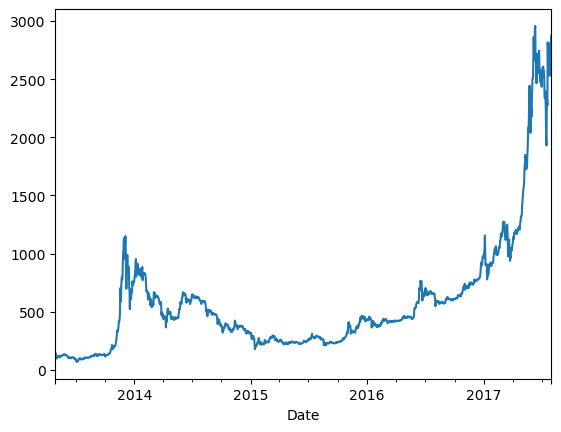

In [85]:
data['Close'].plot()

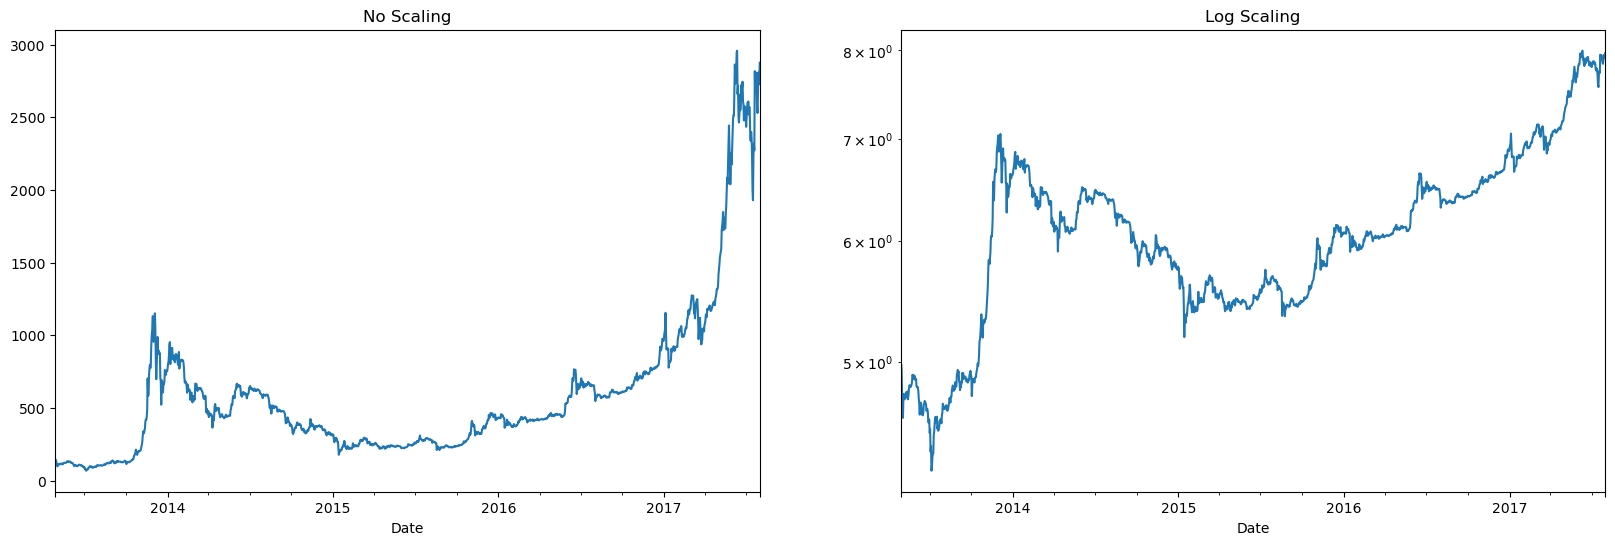

In [95]:
plt.figure(figsize= (20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No Scaling')

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.title('Log Scaling')
plt.yscale('log')

In [ ]:
#Next problem is we have to analyze Close price on yearly, quarterly and monthly basis

In [101]:
data['Close'].resample('YE').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: YE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

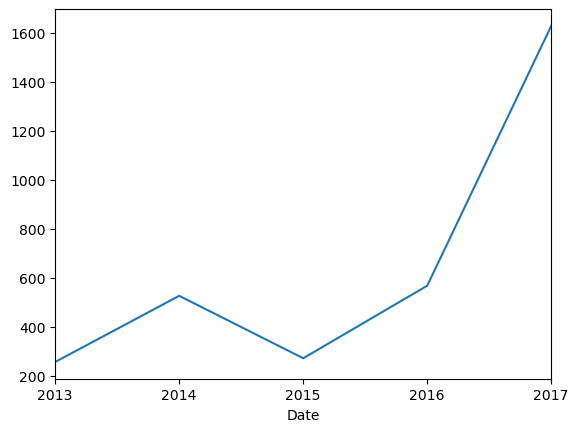

In [103]:
data['Close'].resample('YE').mean().plot()

In [107]:
data['Close'].resample('QE').mean()

Date
2013-06-30     115.162188
2013-09-30     111.291196
2013-12-31     502.657609
2014-03-31     700.586000
2014-06-30     520.929341
2014-09-30     534.055435
2014-12-31     357.075761
2015-03-31     251.209333
2015-06-30     236.858022
2015-09-30     254.859891
2015-12-31     346.037065
2016-03-31     410.728571
2016-06-30     512.492747
2016-09-30     615.702283
2016-12-31     732.721413
2017-03-31    1034.707444
2017-06-30    1912.552198
2017-09-30    2519.418387
Freq: QE-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

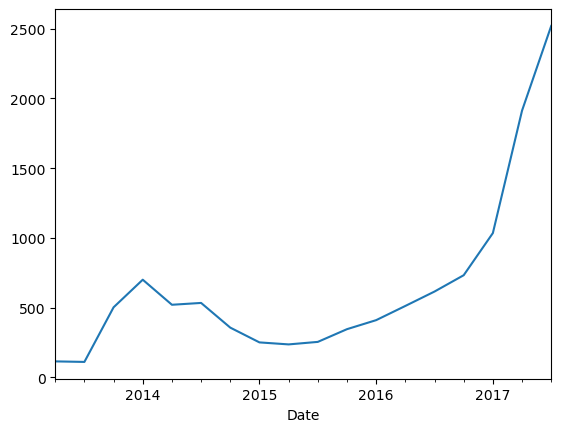

In [109]:
data['Close'].resample('QE').mean().plot()

In [113]:
data['Close'].resample('ME').mean()

Date
2013-04-30     139.250000
2013-05-31     119.993226
2013-06-30     107.761333
2013-07-31      90.512258
2013-08-31     113.905161
2013-09-30     130.061667
2013-10-31     158.311935
2013-11-30     550.420667
2013-12-31     800.780968
2014-01-31     844.168387
2014-02-28     661.618214
2014-03-31     592.200323
2014-04-30     461.362000
2014-05-31     486.651290
2014-06-30     615.917333
2014-07-31     618.025484
2014-08-31     536.087742
2014-09-30     445.186333
2014-10-31     364.150000
2014-11-30     366.100000
2014-12-31     341.268387
2015-01-31     248.782581
2015-02-28     234.153571
2015-03-31     269.041290
2015-04-30     235.491667
2015-05-31     236.996774
2015-06-30     238.081000
2015-07-31     279.563871
2015-08-31     250.734516
2015-09-30     233.595333
2015-10-31     264.855161
2015-11-30     348.883333
2015-12-31     424.464516
2016-01-31     410.844516
2016-02-29     404.408276
2016-03-31     416.525161
2016-04-30     434.339333
2016-05-31     461.953871
2016-06

<Axes: xlabel='Date'>

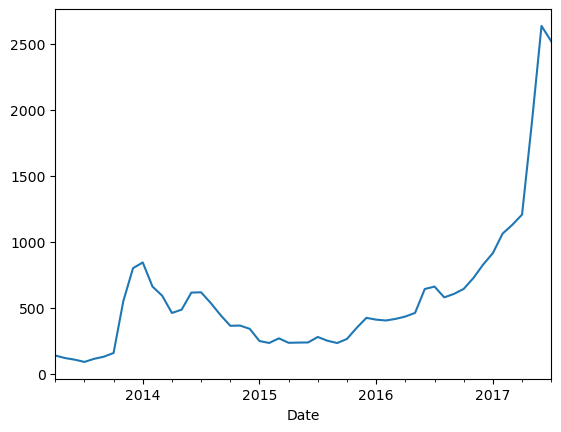

In [119]:
data['Close'].resample('ME').mean().plot()

In [ ]:
#After 2015 you saw a sharp increase in closing price

In [121]:
#Next problem is we have to analyze Daily changes in closing price stocks

In [129]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

In [131]:
data['Close_price_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<Axes: xlabel='Date'>

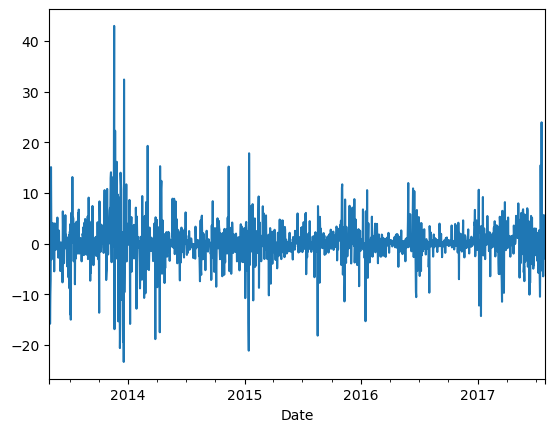

In [133]:
data['Close_price_pct_change'].plot()

In [143]:
import chart_studio,plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [145]:
init_notebook_mode(connected=True)

In [149]:
!pip install cufflinks


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68721 sha256=0f0ecd0ad8a98f5c978edeb31b51e7e115757b86526f5e9c234fbedf03637cbc
  Stored in directory: c:\users\abhiii\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [151]:
import cufflinks as cf

In [153]:
cf.go_offline()

C:\Users\Abhiii\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



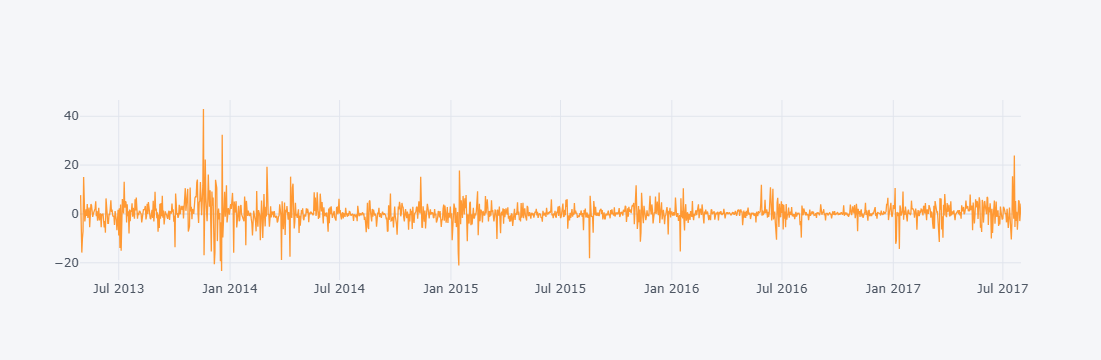

In [155]:
data['Close_price_pct_change'].iplot()